<a href="https://colab.research.google.com/github/bhanu0925/DeepLearning/blob/main/Plotting_Sigmoid_MultiVariate_LearningAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Plotting Sigmoid Function**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Sigmoid

## $f_{w_1,w_2b}(x_1,x_2) = \frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$

## Compute Loss for a given data set

Finding w and b values for a given data set by brootforce method by assining values to w and b

In [88]:
## Define sigmoid function
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [89]:
w_unknow = 0.5
b_unknow = 0.25

X = np.random.random(25)*20-10
Y = sigmoid(X,w_unknow,b_unknow)

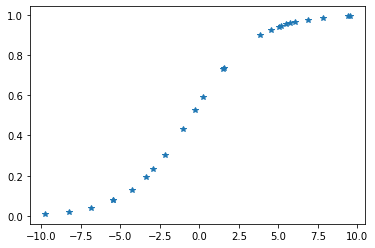

In [91]:
plt.plot(X,Y,"*")
plt.show()

## Loss function

loss = (y - yHAT)*2

In [95]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x ,y in zip(X,Y):
    loss += (y -sigmoid(x,w_est,b_est))**2
  return loss

In [102]:
## assinging range of w values to choose
W = np.linspace(-1,1,100)
B = np.linspace(-1,1,100)

WW, BB = np.meshgrid(W,B)

# define loss matrix = equat to size of weight matrix
Loss = np.zeros(WW.shape)

In [103]:
## In brootforce method we are going to try with different values of W and B , 
for i in range(WW.shape[0]):
  for j in range(BB.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])

In [118]:
np.argmin(Loss)

6274

## Plot the loss calulated for all the w, b

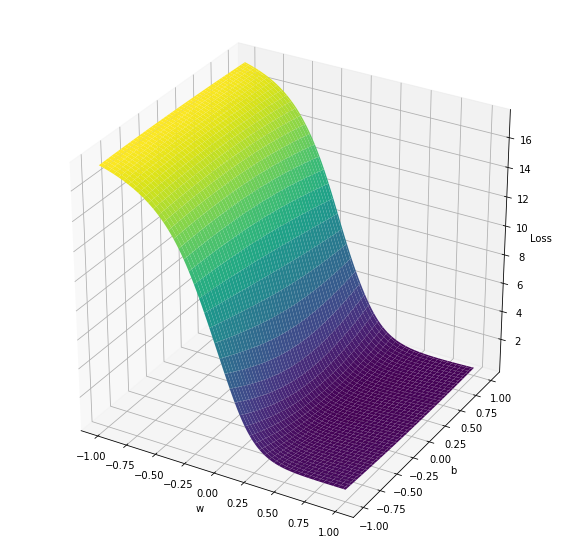

In [110]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');

In [123]:
## Out of all losses calculated, lets find out out the minimun loss out off all
##  no.argmin(Loss) return the indices of where the loss is minimum, the Loss matrix is flatterned and the indices of smallest loss is returned

ij = np.argmin(Loss)
ij

6274

https://thispointer.com/numpy-amin-find-minimum-value-in-numpy-array-and-its-index/

In [147]:

## finding index values
result = np.where(Loss == np.amin(Loss))
i = result[0][0]
j= result[1][0]
i,j


(62, 74)

In [149]:
WW[i,j],BB[i,j]

(0.49494949494949503, 0.2525252525252526)

In [150]:
## at these W and B  we have minimum values of loss.

## Contour Plots

In [154]:
## Define sigmoid function
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1 + w2*x2 + b)))

In [153]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,80)
XX1, XX2 = np.meshgrid(X1,X2)
print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (80,) (80, 100) (80, 100)


In [171]:
w1 = 2
w2 = 0.5
b = 0

Y = sigmoid_2d(XX1,XX2, w1,w2,b)

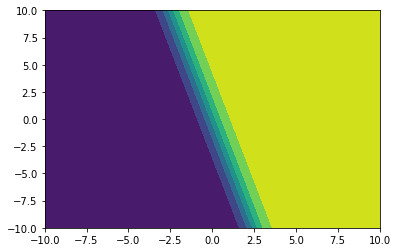

In [172]:
plt.contourf(XX1,XX2,Y)
plt.show()

## **Putting them all in Class**

In [219]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))

  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*(y_pred)*(1-y_pred)*x

  def grad_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*(y_pred)*(1-y_pred)

  def fit(self, X, Y, epochs=1,learning_rate = 1,initialise = True):
    # initialize w,b

    if initialise:
      self.w = np.random.randn(1,X.shape[1])
      self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0

      for x,y in zip(X,Y):
        #import pdb; pdb.set_trace()
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -=learning_rate * dw
      self.b -=learning_rate * db  


In [220]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [221]:
s = SigmoidNeuron()

In [222]:
s.fit(X,Y,initialise=True)

In [230]:
## Plot 
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [231]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

[[0.84465419 1.04400161]] [-0.00027006]
[[0.93334921 0.94569641]] [-0.00156631]
[[0.99670803 0.82372172]] [0.01134531]
[[1.05544087 0.64806233]] [0.04043962]
[[1.12288068 0.36779096]] [0.09192468]
[[ 1.17780217 -0.01231973]] [0.13920417]
[[ 1.14060082 -0.39319038]] [0.08426989]
[[ 1.20376268 -0.40071964]] [0.01748921]
[[ 1.25415193 -0.42629048]] [-0.04254574]
[[ 1.30472511 -0.43539852]] [-0.09597537]
[[ 1.3475917  -0.45328749]] [-0.14438601]
[[ 1.38894583 -0.4640397 ]] [-0.18810016]
[[ 1.42611616 -0.47693451]] [-0.2280116]
[[ 1.46107665 -0.4875997 ]] [-0.26452012]
[[ 1.49350375 -0.49803722]] [-0.29812303]
[[ 1.52391436 -0.50766091]] [-0.32916843]
[[ 1.5524759  -0.51674216]] [-0.3579722]
[[ 1.57940456 -0.52529762]] [-0.38479439]
[[ 1.60486774 -0.53338939]] [-0.4098573]
[[ 1.62901182 -0.54106256]] [-0.43335045]
[[ 1.65196272 -0.54835711]] [-0.45543656]
[[ 1.67382969 -0.55530768]] [-0.476256]
[[ 1.69470804 -0.56194453]] [-0.49593056]
[[ 1.71468133 -0.56829419]] [-0.51456633]
[[ 1.73382321

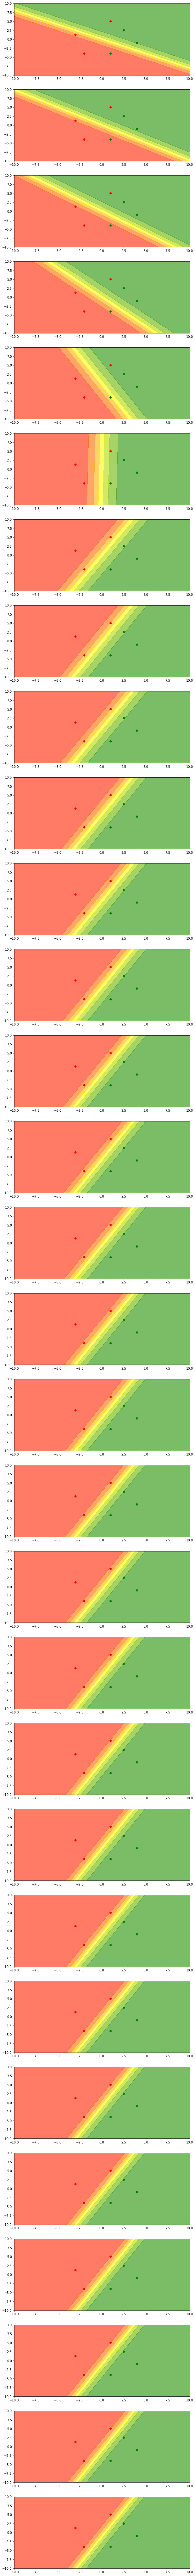

In [232]:
s.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(s.w, s.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, s, ax)
  s.fit(X, Y, 1, 0.5, False)